In [62]:
import pandas as pd
import os
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [70]:
data_dir = os.getcwd() + '/yelp_dataset'

def load_dataset(data_dir, file):
    df = pd.DataFrame([])
    data_chunk = pd.read_json(os.path.join(data_dir, file), lines=True, chunksize=100000)
    for chunk in data_chunk:
          df = pd.concat([df, chunk])
    return df

print('Loading business data ...')
df_business = load_dataset(data_dir, 'business.json')
print('Loading checkin data ...')
df_checkin = load_dataset(data_dir, 'checkin.json')
# print('Loading review data ...')
# df_review = load_dataset(data_dir, 'review.json')
# print('Loading tip data ...')
# df_tip = load_dataset(data_dir, 'tip.json')
# print('Loading user data ...')
# df_user = load_dataset(data_dir, 'user.json')
print('All datasets have been loaded!')

Loading business data ...
Loading checkin data ...
All datasets have been loaded!


In [6]:
df_business.groupby('is_open').count()

,address,attributes,business_id,categories,city,hours,latitude,longitude,name,postal_code,review_count,stars,state
is_open,,,,,,,,,,,,,
0,34084,31021,34084,34063,34084,21713,34084,34084,34084,34084,34084,34084,34084
1,158525,132752,158525,158064,158525,126066,158525,158525,158525,158525,158525,158525,158525


In [26]:
df_business.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,2818 E Camino Acequia Drive,{'GoodForKids': 'False'},1SWheh84yJXfytovILXOAQ,"Golf, Active Life",Phoenix,None,0,33.522143,-112.018481,Arizona Biltmore Golf Club,85016,5,3.0,AZ
1,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON
2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170,4.0,NC
3,"15655 W Roosevelt St, Ste 237",None,xvX2CttrVhyG2z1dFg_0xw,"Insurance, Financial Services",Goodyear,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,33.455613,-112.395596,Farmers Insurance - Paul Lorenz,85338,3,5.0,AZ
4,"4209 Stuart Andrew Blvd, Ste F","{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...",HhyxOkGAM07SRYtlQ4wMFQ,"Plumbing, Shopping, Local Services, Home Servi...",Charlotte,"{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",1,35.190012,-80.887223,Queen City Plumbing,28217,4,4.0,NC


In [76]:
def checkin_features(df):
    print('Extracting checkin features...')
    checkin = df['date'].values
    checkin_split = list(map(lambda x: x.split(','), checkin))
    # extract 1st and last checkin time
    checkin_start = np.array([pd.Timestamp(i[0]) for i in checkin_split])
    checkin_stop = np.array([pd.Timestamp(i[-1]) for i in checkin_split])
    # get duration of checkin 
    checkin_duration = checkin_stop - checkin_start
    df['checkin_duration'] = [item/pd.Timedelta(days=365.25) for item in checkin_duration]
    # extract 1st and last checkin year and month
    df['checkin_start_year'] = list(map(lambda x: x.year, checkin_start))
    df['checkin_start_month'] = list(map(lambda x: x.month, checkin_start))
    df['checkin_latest_year'] = list(map(lambda x: x.year, checkin_stop))
    df['checkin_latest_month'] = list(map(lambda x: x.month, checkin_stop))
    # get number of checkins
    df['checkin_counts'] = list(map(lambda x: len(x), checkin_split))
    print('Checkin features have been extracted!')
    
    return df

df_checkin = checkin_features(df_checkin)

Extracting checkin features...
Checkin features have been extracted!


In [77]:
df_new = df_business.merge(df_checkin, on='business_id', how='inner')

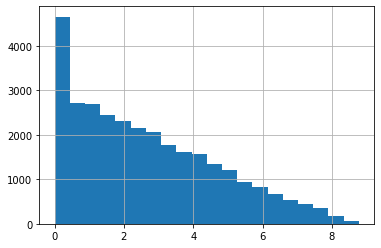

In [98]:
df_new[df_new['is_open']==0]['checkin_duration'].hist(bins=20)
plt.show()

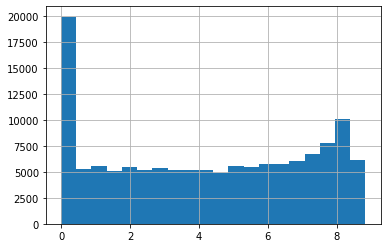

In [99]:
df_new[df_new['is_open']==1]['checkin_duration'].hist(bins=20)
plt.show()

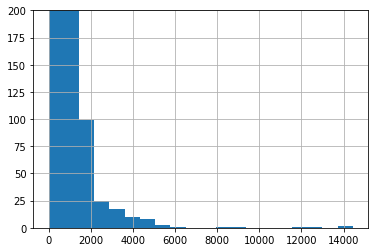

In [105]:
df_new[df_new['is_open']==0]['checkin_counts'].hist(bins=20)
plt.ylim([0, 200])
plt.show()

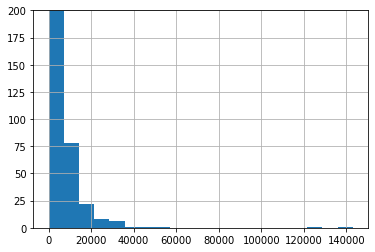

In [104]:
df_new[df_new['is_open']==1]['checkin_counts'].hist(bins=20)
plt.ylim([0, 200])
plt.show()

In [107]:
df_user.columns

Index(['average_stars', 'compliment_cool', 'compliment_cute',
       'compliment_funny', 'compliment_hot', 'compliment_list',
       'compliment_more', 'compliment_note', 'compliment_photos',
       'compliment_plain', 'compliment_profile', 'compliment_writer', 'cool',
       'elite', 'fans', 'friends', 'funny', 'name', 'review_count', 'useful',
       'user_id', 'yelping_since'],
      dtype='object')